In [80]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# 1. Load the dataset into python environment

In [81]:
# Read the dataset
Data = pd.read_csv('titanic_dataset.csv')
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Make ‘PassengerId’ as the index column


In [82]:
# Read the dataset and reset the index as PassengerId
DataIndex = pd.read_csv('titanic_dataset.csv', index_col="PassengerId")
DataIndex.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Check the basic details of the dataset

In [83]:
# Display the data types
DataIndex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [84]:
# Summary of statistics
DataIndex.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 4. Fill in all the missing values present in all the columns in the dataset

In [86]:
# Checking the missing values using isnull() function 
DataIndex.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [89]:
# Handling missing values in Age using median
DataIndex['Age']=DataIndex['Age'].fillna(DataIndex['Age'].median())

# Handling missing values in Cabin setting it as unknown
DataIndex['Cabin']= DataIndex['Cabin'].fillna('Unknown')

# Handling missing values in Embarked using mode
DataIndex['Embarked']= DataIndex['Embarked'].fillna(DataIndex['Embarked'].mode()[0])

In [12]:
DataIndex


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Unknown,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,Unknown,S


In [90]:
# Final check to make sure that Null values are handled properly
DataIndex.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# 5. Check and handle outliers in at least 3 columns in the dataset


Handling Outliers for Age


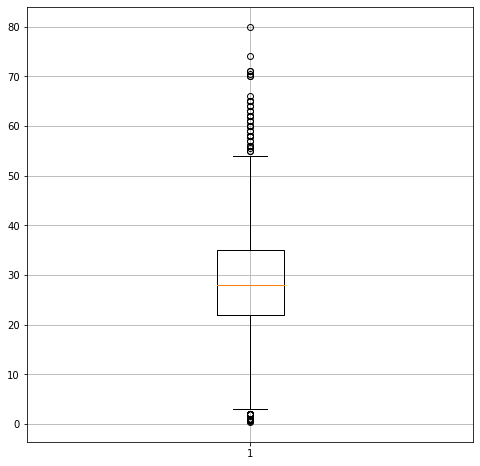

In [91]:
plt.figure(figsize=(8,8))
plt.boxplot(DataIndex["Age"])
plt.grid()

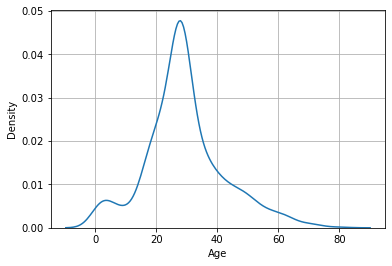

In [93]:
sns.kdeplot(DataIndex["Age"])
plt.grid()

In [55]:
DataIndex["Age"].skew()

0.17716995832595483

In [56]:
Q1 = np.percentile(DataIndex["Age"],25)
Q2 = np.percentile(DataIndex["Age"],50)
Q3 = np.percentile(DataIndex["Age"],75)
IQR = Q3 - Q1
lower_limit = Q1 - .0002 * IQR
upper_limit = Q3 + .0002 * IQR

print(f"The first Quartile = {Q1},\nThe Second Quartile = {Q2}, \nThe Third Quartile = {Q3}, \nIQR = {IQR}, \n\nlower limit = {lower_limit},\nupper limit = {upper_limit}")

outlier = []
for x in DataIndex["Age"]:
    if (x < lower_limit) or (x > upper_limit):
        outlier.append(x)
print(f"\nThe outliers are = {outlier}")

index_dropped = DataIndex[(DataIndex["Age"] < lower_limit) | (DataIndex["Age"] > upper_limit)].index
DataIndex.drop(index_dropped,inplace=True)
DataIndex

The first Quartile = 27.0,
The Second Quartile = 28.0, 
The Third Quartile = 29.0, 
IQR = 2.0, 

lower limit = 26.9996,
upper limit = 29.0004

The outliers are = [22.0, 26.0, 35.0, 35.0, 31.0, 35.0, 34.0, 22.0, 26.0, 32.0, 26.0, 32.0, 25.0, 30.0, 22.0, 33.0, 23.0, 24.0, 26.0, 23.0, 34.0, 34.0, 33.0, 22.0, 24.0, 32.5, 32.5, 24.0, 33.0, 25.0, 23.0, 24.0, 22.0, 24.0, 22.0, 30.0, 26.0, 30.0, 32.0, 24.0, 34.0, 32.0, 26.0, 24.0, 35.0, 22.0, 30.0, 31.0, 32.0, 30.0, 22.0, 35.0, 24.0, 33.0, 22.0, 30.0, 25.0, 24.0, 30.0, 30.0, 35.0, 25.0, 35.0, 25.0, 35.0, 33.0, 30.0, 22.0, 22.0, 26.0, 24.0, 24.0, 23.5, 30.0, 30.0, 24.0, 26.0, 26.0, 24.0, 31.0, 22.0, 30.0, 22.0, 31.0, 24.0, 25.0, 24.0, 23.0, 25.0, 22.0, 35.0, 30.0, 24.0, 25.0, 22.0, 22.0, 32.0, 35.0, 23.0, 24.0, 22.0, 31.0, 23.0, 26.0, 34.0, 33.0, 34.0, 30.0, 32.0, 24.0, 31.0, 25.0, 34.0, 30.0, 34.0, 33.0, 23.0, 22.0, 34.0, 22.0, 25.0, 35.0, 30.0, 25.0, 24.0, 33.0, 26.0, 24.0, 34.0, 32.0, 30.0, 22.0, 23.0, 30.0, 30.0, 22.0, 32.0, 33.0, 22.0, 22.

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Unknown,Q
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,Unknown,S
18,1,2,"Williams, Mr. Charles Eugene",male,28.0,0,0,244373,13.0000,Unknown,S
20,1,3,"Masselmani, Mrs. Fatima",female,28.0,0,0,2649,7.2250,Unknown,C
24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...,...,...
875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,Unknown,C
879,0,3,"Laleff, Mr. Kristo",male,28.0,0,0,349217,7.8958,Unknown,S
884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,Unknown,S


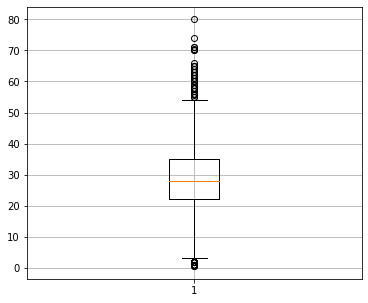

In [94]:
plt.figure(figsize=(6,5))
plt.boxplot(DataIndex["Age"])
plt.grid()

Handling Outliers for Fare

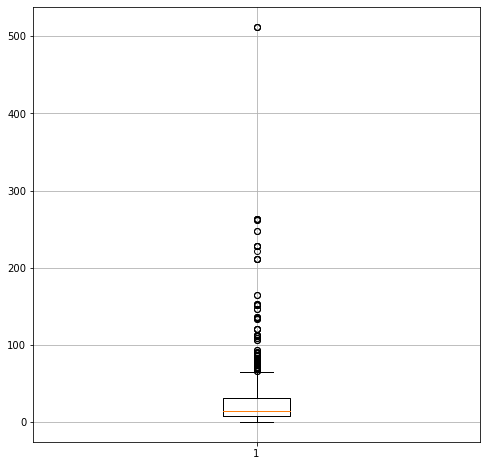

In [95]:
plt.figure(figsize=(8,8))
plt.boxplot(DataIndex["Fare"])
plt.grid()

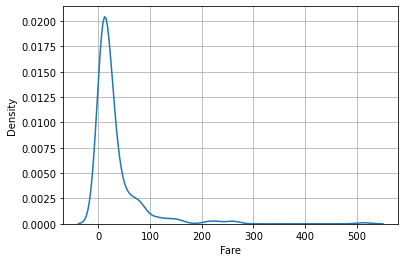

In [96]:
sns.kdeplot(DataIndex["Fare"])
plt.grid()

In [60]:
DataIndex["Fare"].skew()

3.9828740236879203

The first Quartile = 7.75625,
The Second Quartile = 9.5, 
The Third Quartile = 25.137525, 
IQR = 17.381275000000002, 

lower limit = 7.408624499999999,
upper limit = 25.4851505

The outliers are = [7.225, 35.5, 7.225, 146.5208, 82.1708, 7.2292, 26.0, 35.5, 7.2292, 27.7208, 47.1, 26.0, 7.3125, 69.55, 55.0, 25.925, 56.4958, 69.55, 50.0, 69.55, 7.25, 79.2, 31.0, 0.0, 26.0, 27.7208, 30.5, 110.8833, 69.55, 133.65, 66.6, 35.0, 7.225, 27.7208, 7.2292, 82.1708, 211.5, 6.8583, 0.0, 7.25, 26.0, 26.55, 51.8625, 0.0, 7.25, 52.0, 7.0458, 0.0, 26.55, 7.225, 7.2292, 221.7792, 7.2292, 26.0, 227.525, 7.2292, 33.0, 7.225, 42.4, 30.5, 7.05, 0.0, 56.4958, 52.0, 0.0, 76.7292, 56.4958, 26.55, 53.1, 211.3375, 0.0, 30.0, 39.6, 7.225, 30.0, 69.55, 30.6958, 6.975, 0.0, 6.95, 56.4958, 7.2292, 29.7, 69.55, 33.0, 89.1042, 7.2292, 69.55]


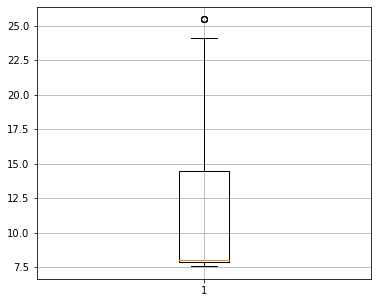

In [64]:
Q1 = np.percentile(DataIndex["Fare"],25)
Q2 = np.percentile(DataIndex["Fare"],50)
Q3 = np.percentile(DataIndex["Fare"],75)
IQR = Q3 - Q1
lower_limit = Q1 - .02 * IQR
upper_limit = Q3 + .02 * IQR

print(f"The first Quartile = {Q1},\nThe Second Quartile = {Q2}, \nThe Third Quartile = {Q3}, \nIQR = {IQR}, \n\nlower limit = {lower_limit},\nupper limit = {upper_limit}")

outlier = []
for x in DataIndex["Fare"]:
    if (x < lower_limit) or (x > upper_limit):
        outlier.append(x)
print(f"\nThe outliers are = {outlier}")

index_dropped = DataIndex[(DataIndex["Fare"] < lower_limit) | (DataIndex["Fare"] > upper_limit)].index
DataIndex.drop(index_dropped,inplace=True)
DataIndex
plt.figure(figsize=(6,5))
plt.boxplot(DataIndex["Fare"])
plt.grid()

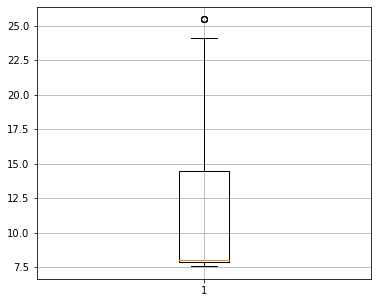

In [65]:
plt.figure(figsize=(6,5))
plt.boxplot(DataIndex["Fare"])
plt.grid()

Handling Outliers for SibSp


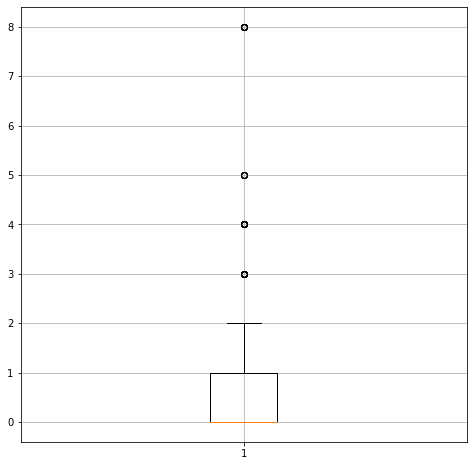

In [97]:
plt.figure(figsize=(8,8))
plt.boxplot(DataIndex["SibSp"])
plt.grid()

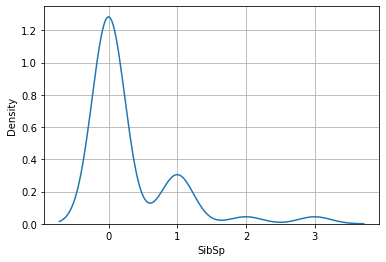

In [67]:
sns.kdeplot(DataIndex["SibSp"])
plt.grid()

In [68]:
DataIndex["SibSp"].skew()

2.449491842599102

In [69]:
Q1 = np.percentile(DataIndex["SibSp"],25)
Q2 = np.percentile(DataIndex["SibSp"],50)
Q3 = np.percentile(DataIndex["SibSp"],75)
IQR = Q3 - Q1
lower_limit = Q1 - .02 * IQR
upper_limit = Q3 + .02 * IQR

print(f"The first Quartile = {Q1},\nThe Second Quartile = {Q2}, \nThe Third Quartile = {Q3}, \nIQR = {IQR}, \n\nlower limit = {lower_limit},\nupper limit = {upper_limit}")

outlier = []
for x in DataIndex["SibSp"]:
    if (x < lower_limit) or (x > upper_limit):
        outlier.append(x)
print(f"\nThe outliers are = {outlier}")

index_dropped = DataIndex[(DataIndex["SibSp"] < lower_limit) | (DataIndex["SibSp"] > upper_limit)].index
DataIndex.drop(index_dropped,inplace=True)
DataIndex

The first Quartile = 0.0,
The Second Quartile = 0.0, 
The Third Quartile = 0.0, 
IQR = 0.0, 

lower limit = 0.0,
upper limit = 0.0

The outliers are = [1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 2, 2, 1, 1, 2, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Unknown,Q
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,Unknown,S
18,1,2,"Williams, Mr. Charles Eugene",male,28.0,0,0,244373,13.0000,Unknown,S
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,28.0,0,0,330959,7.8792,Unknown,Q
30,0,3,"Todoroff, Mr. Lalio",male,28.0,0,0,349216,7.8958,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...
838,0,3,"Sirota, Mr. Maurice",male,28.0,0,0,392092,8.0500,Unknown,S
869,0,3,"van Melkebeke, Mr. Philemon",male,28.0,0,0,345777,9.5000,Unknown,S
879,0,3,"Laleff, Mr. Kristo",male,28.0,0,0,349217,7.8958,Unknown,S


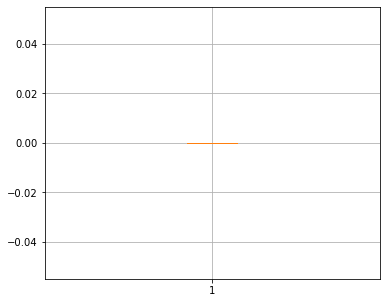

In [70]:
plt.figure(figsize=(6,5))
plt.boxplot(DataIndex["SibSp"])
plt.grid()

We have now cleared the outliers in Age, Fare and SibSp using percentiles.


# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [71]:
from sklearn import preprocessing
minmax_scale = preprocessing.MinMaxScaler().fit(DataIndex[['Survived','Age']])
data_minmax = minmax_scale.transform(DataIndex[['Survived', 'Age']])


In [72]:
print('Min-value after min-max scaling:\nSurvived={:.2f}, Age={:.2f}'
      .format(data_minmax[:,0].min(), data_minmax[:,1].min()))
print('\nMax-value after min-max scaling:\nSurvived={:.2f}, Age={:.2f}'
      .format(data_minmax[:,0].max(), data_minmax[:,1].max()))

Min-value after min-max scaling:
Survived=0.00, Age=0.00

Max-value after min-max scaling:
Survived=1.00, Age=1.00


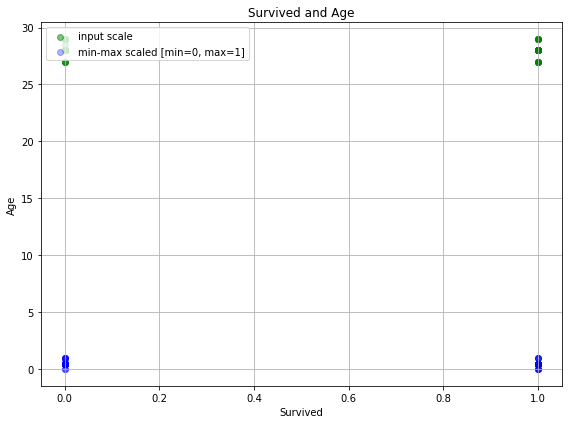

In [79]:
def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(DataIndex['Survived'], DataIndex['Age'],
            color='green', label='input scale', alpha=0.5)

    plt.scatter(data_minmax[:,0], data_minmax[:,1],
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('Survived and Age')
    plt.xlabel('Survived')
    plt.ylabel('Age')
    plt.legend(loc='upper left')
    plt.grid()

    plt.tight_layout()

plot()
plt.show()